In [28]:
import pandas_datareader.data as web    
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import datetime
import plotly.io as pio
pio.renderers.default = 'svg'
import plotly.express as px

### Cyclical Model

In [29]:
T = np.arange(100)

def model(a, ω, θ, T):
    Y = 2*a*np.cos(ω*T+θ)
    return Y

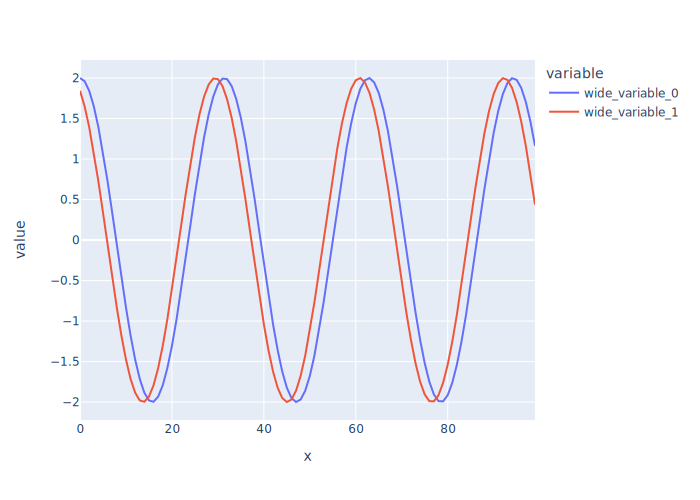

In [30]:
# Phase Shift
px.line(y=[model(1, 0.2, 0, T), model(1, 0.2, 0.4, T)],x=T)

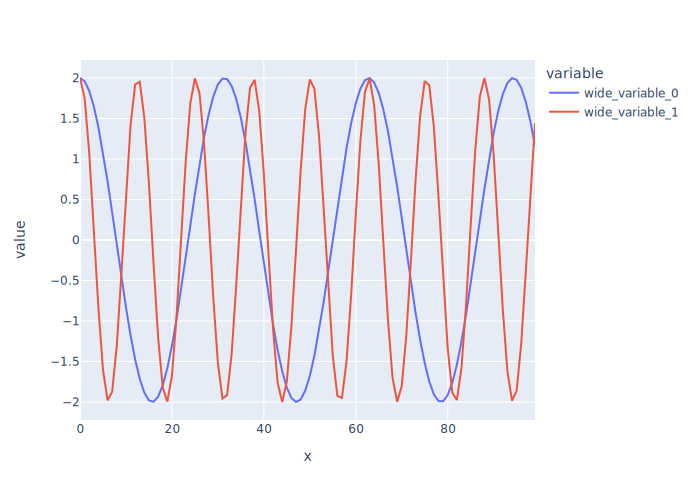

In [31]:
# Frequency
px.line(y=[model(1, 0.2, 0, T), model(1, 0.5, 0, T)],x=T)

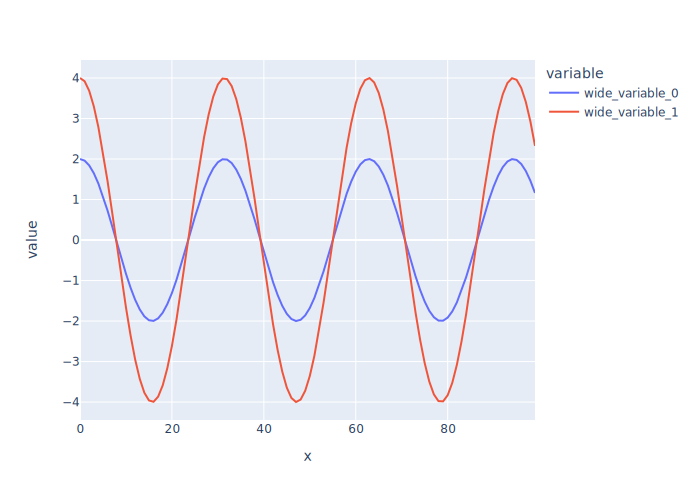

In [32]:
# Amplitude
px.line(y=[model(1, 0.2, 0, T), model(2, 0.2, 0, T)],x=T)

### Shrumpeter's Model: Additive Model with multiple cycles

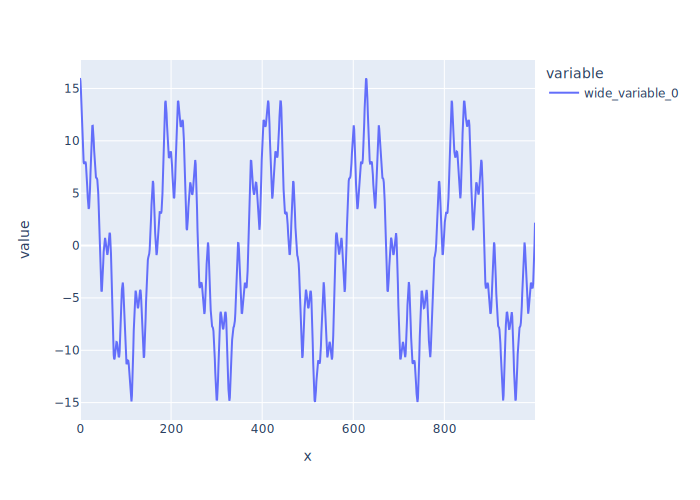

In [33]:
T = np.arange(1000)

def model2(a, ω, θ, T):
    Y = np.zeros(T.shape)
    for i in range(len(a)):
        Y += model(a[i], ω[i], θ[i], T)
    return Y

a = [5,2,1]
ω = [0.03, 0.20, 0.47]
θ = [0,0,0]
px.line(y=[model2(a, ω, θ, T)],x=T)

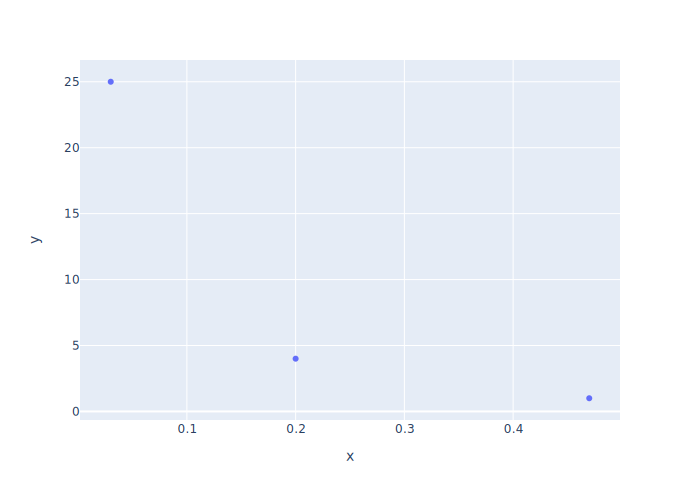

In [34]:
# Spectrum
px.scatter(y=[i**2 for i in a],x=ω)    

### Periodogram - finding dominant frequencies

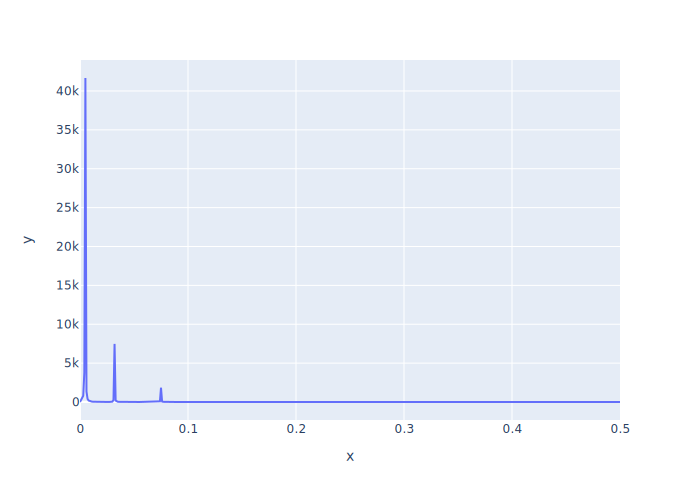

In [35]:
from scipy.signal import periodogram
y = model2(a, ω, θ, T)
f, P = periodogram(y)
px.line(y=P,x=f)

### Filtering - Band pass filter removes certain frequencies

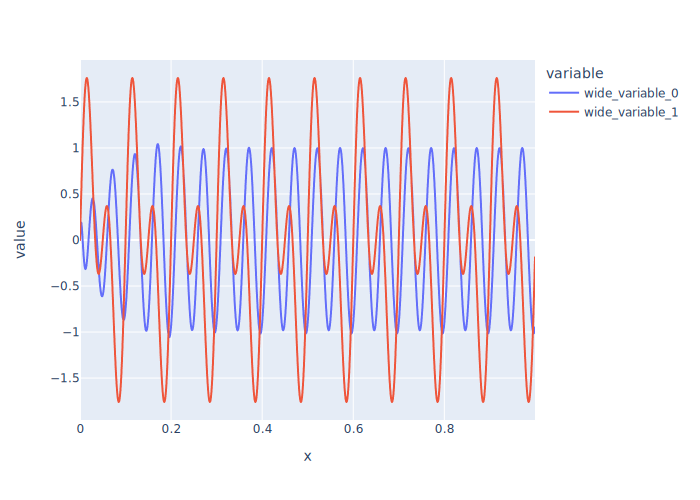

In [36]:
# 1 Hertz is 1 cycle per unit time. 
# Original series has 10 and 20 Hz of cycles in it
# Filtered series has only 10 Hz of cycles in it
T = np.linspace(0, 1, 1000, False)
y = np.sin(2*np.pi*10*T) + np.sin(2*np.pi*20*T)

band = signal.butter(10, 15, 'hp', fs=1000, output='sos')
y_filtered = signal.sosfilt(band, y)
px.line(y=[y_filtered,y],x=T)

#### Band Pass

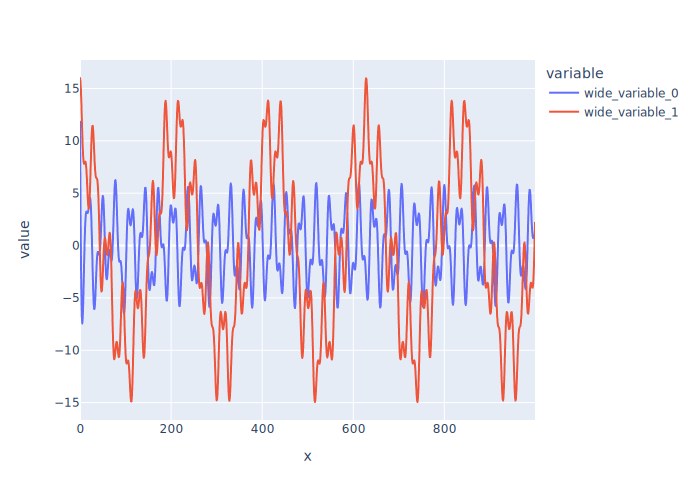

In [37]:
# Band pass filter: elminating frequencies from 0.1 to 0.3
T = np.arange(1000)
y = model2(a, ω, θ, T)
f1, f2 = 0.1, 0.3
numtaps = 1000
signal.firwin(numtaps, [f1, f2], pass_zero=False)
y_filtered = signal.sosfilt(band, y)
px.line(y=[y_filtered,y],x=T)

#### HP Filter

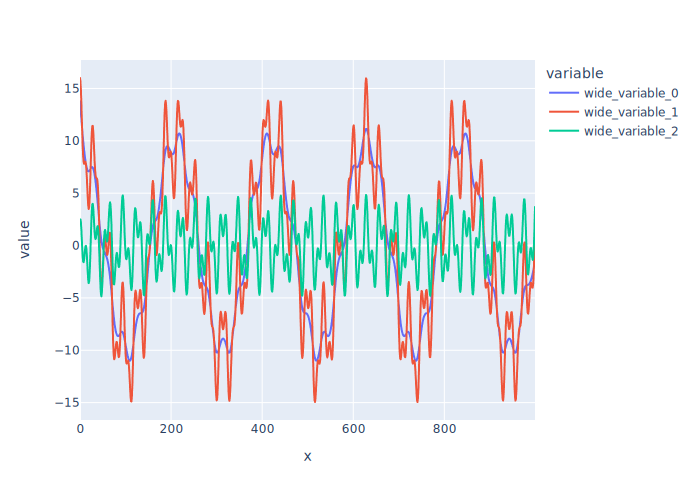

In [38]:
# HP Filter
T = np.arange(1000)
y = model2(a, ω, θ, T)

import statsmodels.api as sm
y_cycles, y_trend = sm.tsa.filters.hpfilter(y, 1600)
px.line(y=[y_trend,y, y_cycles],x=T)

### US Business Cycles - Hours Worked 

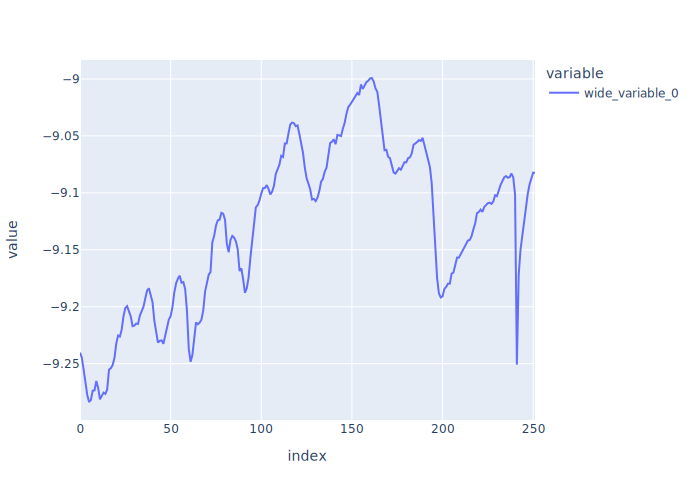

In [39]:
import pandas_datareader.data as web
import pandas as pd
from scipy import signal
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2023, 1, 27)
df = pd.DataFrame([])
df['hours'] = web.DataReader("HOANBS", "fred", start, end)
df['pop'] = web.DataReader("POPTHM", "fred", start, end).resample('QS').sum()
y = np.log(df['hours']/df['pop'])

f1, f2 = 0.06, 0.1
numtaps = 252
signal.firwin(numtaps, [f1, f2], pass_zero=False)
y_filtered = signal.sosfilt(band, y)
px.line(y=[y])

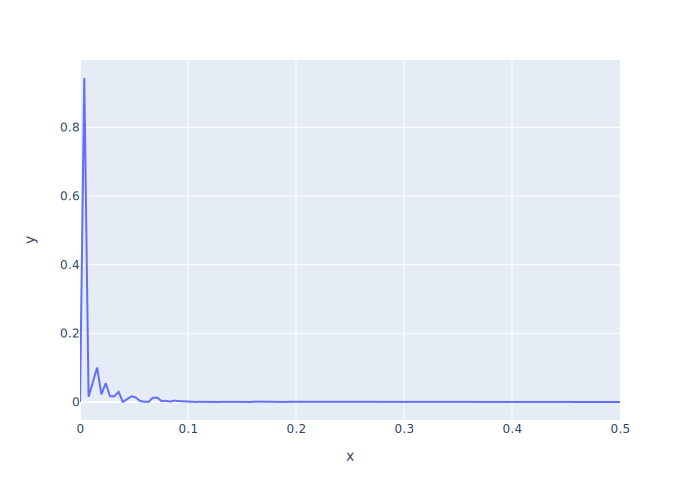

In [40]:
f, P = periodogram(y)
px.line(y=P,x=f)